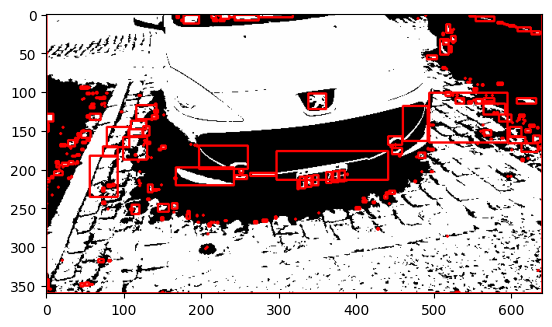

In [347]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def detect_pattent(img):
    # Load the image
    img = cv2.imread(img)
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Thresholding
    _, thresh = cv2.threshold(gray, 100, 254, cv2.THRESH_OTSU)

    # Morphological Opening
    B = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
    Aop = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, B)
    Acl = cv2.morphologyEx(Aop, cv2.MORPH_CLOSE, B)

    # Find connected components and draw rectangles
    num_labels, labels, stats, centroids  = cv2.connectedComponentsWithStats(thresh, 4, cv2.CV_32S)
    
    # Convert to uint8 and use BGR color
    img_for_drawing = cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)

    for st in stats:
        ratio = st[2] / st[3]
        #if 0.3 < ratio < 0.7 and 3 < st[2] < 29 and 10 < st[3] < 40:
        cv2.rectangle(img_for_drawing, (st[0], st[1]), (st[0] + st[2], st[1] + st[3]), color=(255, 0, 0), thickness=2)

    return img_for_drawing

img_path = 'Patentes/img02.png'
result_image = detect_pattent(img_path)

plt.imshow(result_image, cmap='gray')
plt.show()

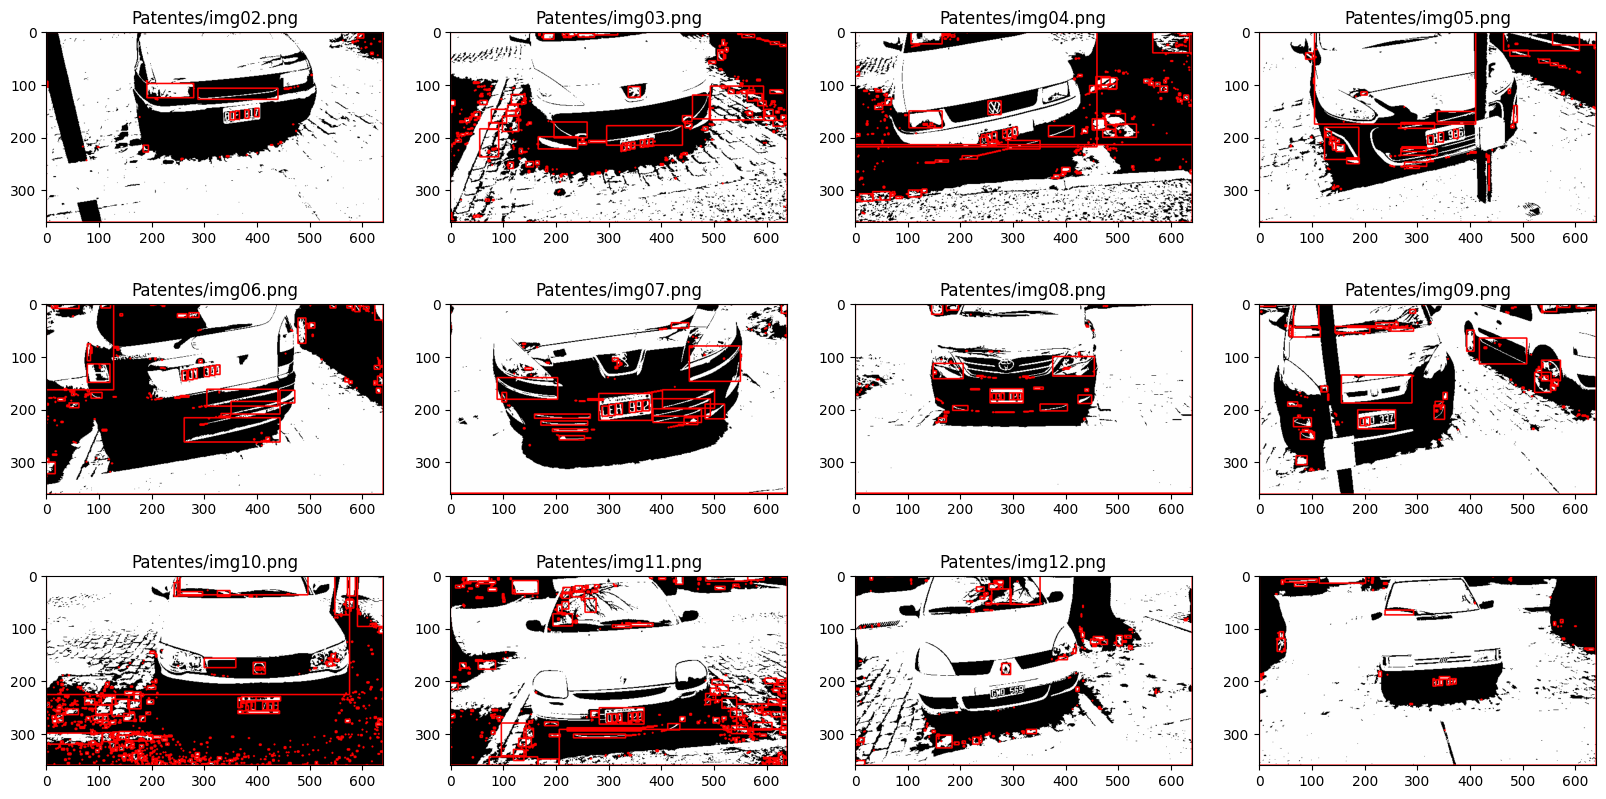

In [354]:
plt.figure(figsize=(20,10))

for i in range (1,13):
    img = 'Patentes/img'+("0"+str(i) if i<=9 else str(i))+'.png'
    thresh = detect_pattent(img)
    canvas = np.zeros_like(thresh)
    plt.title('Patentes/img'+("0"+str(i) if i<=9 else str(i))+'.png')
    plt.subplot(3,4,i)
    plt.imshow(thresh, cmap='gray')
    # cv2.drawContours(canvas, countors, -1, (0,255,0), 2)
plt.show()

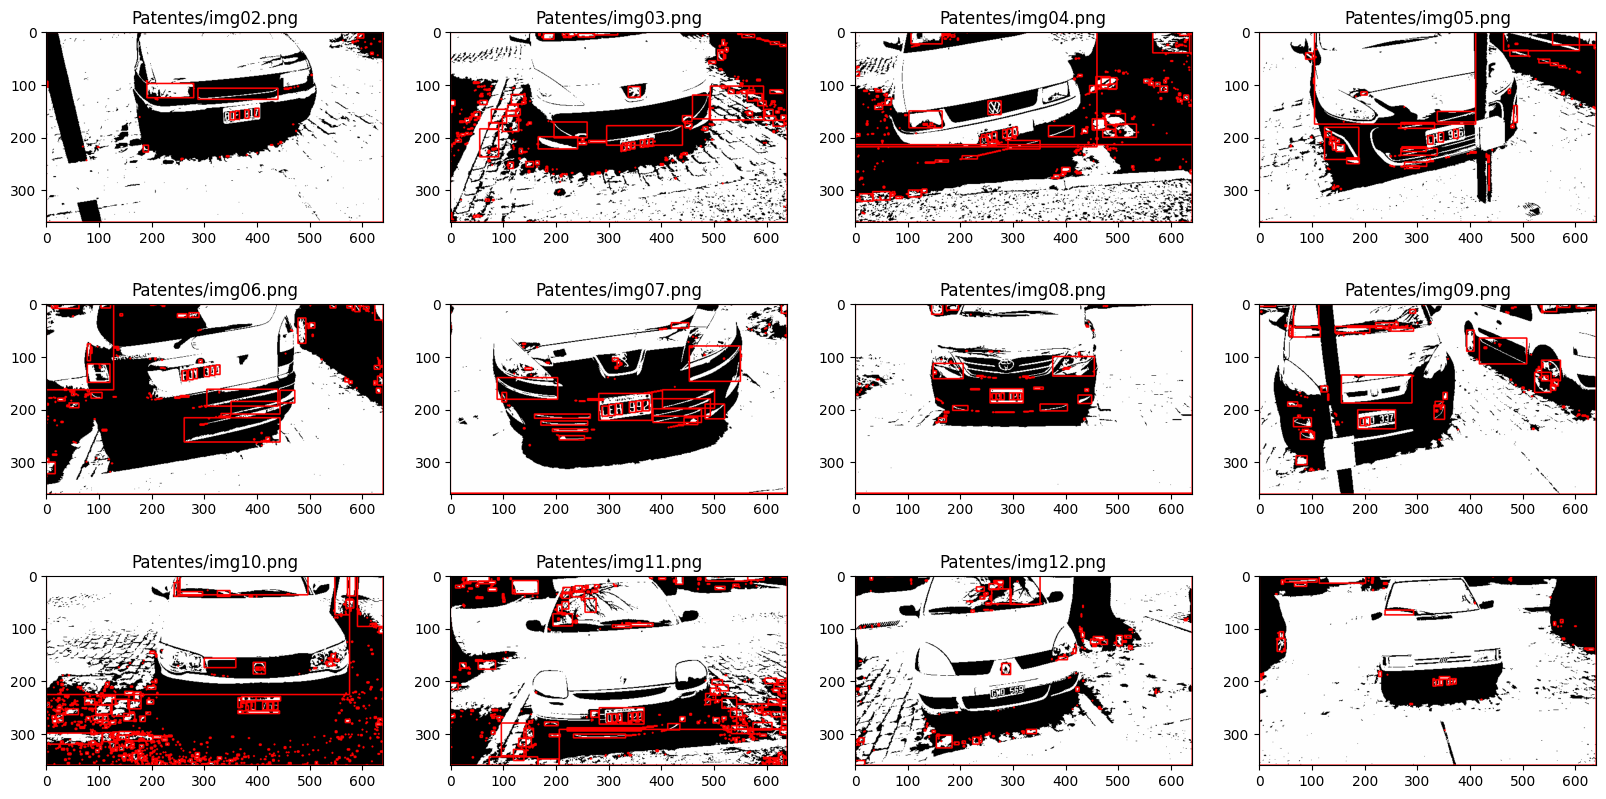

In [348]:
plt.figure(figsize=(20,10))

for i in range (1,13):
    img = 'Patentes/img'+("0"+str(i) if i<=9 else str(i))+'.png'
    thresh = detect_pattent(img)
    canvas = np.zeros_like(thresh)
    plt.title(img)
    plt.subplot(3,4,i)
    plt.imshow(thresh, cmap='gray')
    # cv2.drawContours(canvas, countors, -1, (0,255,0), 2)
plt.show()